# The Famous Lighthouse Problem (2D) - MCMC

Described initially by Steve Gull and supposedly given to undergraduates at Cambridge (he told me that was a white lie!), this excellent bayesian inference problem tries to find a lighthouse off the shore of a coast. 

A likelihood is defined, and then the Markov Chain Monte Carlo method is used to sample it to find the lighthouse. Refer to the MCMC notebook for the breakdown of how this algorithm works.

-8.60366830751


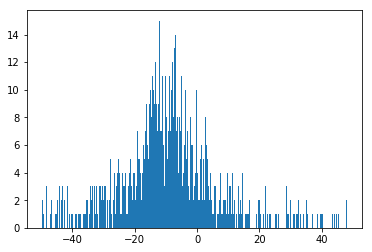

In [54]:
## Sivia Chapter 3!

import numpy
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from scipy.optimize import minimize




lighthouse_position_b = 10 #We know the distance from the coast.
lighthouse_position_a = -10 #True position along coast (what we will infer)

## Draw samples from a cauchy distribution
s =lighthouse_position_a + lighthouse_position_b*numpy.random.standard_cauchy(1000)
s = s[(s>-50) & (s<50)]
print(s.mean())
plt.hist(s, bins=350)
plt.show()

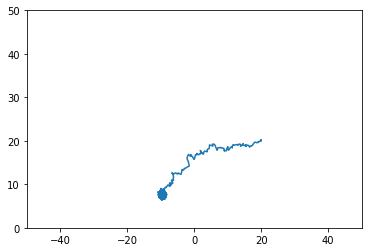

In [74]:



## Lets use log likelihoods
def calculate_likelihood(a,b,data,scale):
    return (b > 0) * numpy.sum(numpy.log( b / (numpy.square(b) + numpy.square(data - a))))/scale

## Use Metropolis Hastings to find the lighthouse!

n_mc = 10000


markov_chain=numpy.zeros((n_mc,2))
markov_chain[0] = [20,20] #Initial guess

#Proposals

meanp = numpy.asarray([0,0])
covp = numpy.asarray([[0.1,0],[0,0.1]])

acceptances = 0

for i in numpy.arange(n_mc-1):
    
    current_val = markov_chain[i]
    proposed_val = current_val + \
                numpy.random.multivariate_normal(meanp,covp)
    pdf_curr = calculate_likelihood(current_val[0],current_val[1],s,1)
    pdf_proposed=calculate_likelihood(proposed_val[0],proposed_val[1],s,1)
    ratio = numpy.exp(pdf_proposed - pdf_curr)
    #print(pdf_proposed)
    #print(pdf_curr)
    #print(ratio)
    rand = numpy.random.rand()
    if ratio > rand:
        markov_chain[i+1] = proposed_val
        acceptances += 1
    else:
        markov_chain[i+1] = current_val
        

fig = plt.figure()
ax = fig.add_subplot(111)

a = markov_chain[:,0]
b = markov_chain[:,1]

line = Line2D(a,b)
ax.add_line(line)
ax.set_xlim(-50,50)
ax.set_ylim(0,50)
plt.show()


